# Health Care Stocks 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "Health Care"
symbols = ['BIIB', 'BIO', 'ALXN', 'ABC', 'TFX', 'DXCM', 'REGN', 'WST', 'XLV']
start = '2018-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

905

In [7]:
df.head()

,BIIB,BIO,ALXN,ABC,TFX,DXCM,REGN,WST,XLV
Date,,,,,,,,,
2018-01-02,334.170013,241.419998,124.050003,89.840126,251.766602,57.990002,382.600006,98.237854,79.736702
2018-01-03,339.850006,250.470001,124.949997,90.174469,253.654373,58.080002,393.779999,98.356316,80.499641
2018-01-04,339.989990,248.490005,122.690002,89.973854,251.054962,52.250000,382.950012,98.326698,80.614067
2018-01-05,342.489990,249.050003,122.800003,91.062935,254.731705,53.259998,385.100006,99.560852,81.300713
2018-01-08,329.649994,251.000000,119.699997,92.572395,255.670639,55.439999,372.519989,100.123627,81.005074


In [8]:
df.tail()

,BIIB,BIO,ALXN,ABC,TFX,DXCM,REGN,WST,XLV
Date,,,,,,,,,
2020-06-19,271.000000,451.959991,119.349998,102.150002,368.390015,409.359985,643.919983,216.589996,100.325005
2020-06-22,264.290009,456.489990,116.919998,101.730003,368.100006,406.329987,628.479980,217.800003,99.940002
2020-06-23,268.190002,451.779999,115.489998,101.500000,368.470001,406.899994,628.760010,217.539993,100.370003
2020-06-24,263.040009,432.420013,111.949997,98.839996,355.309998,394.299988,605.039978,216.509995,97.750000
2020-06-25,262.630005,437.239990,113.470001,100.669998,354.959991,398.089996,619.960022,223.360001,98.709999


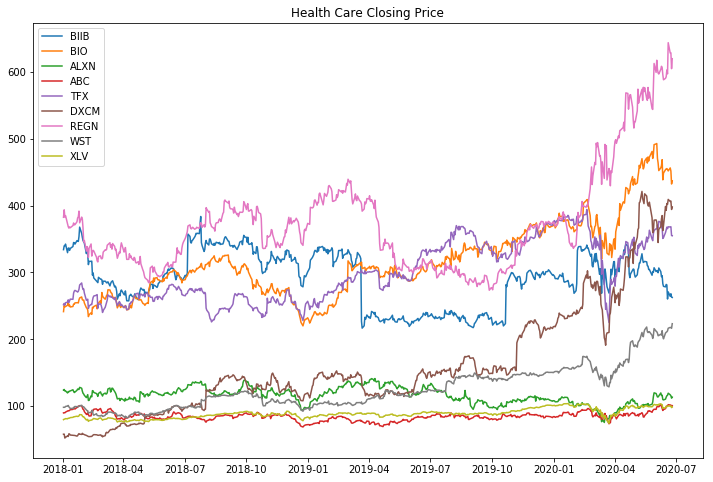

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

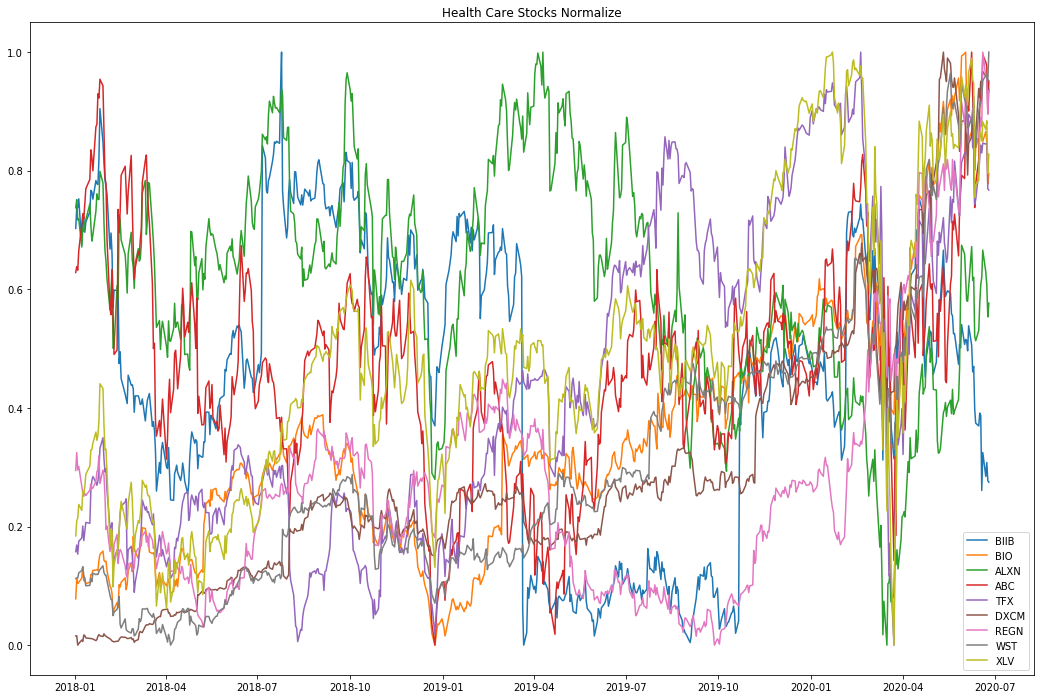

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

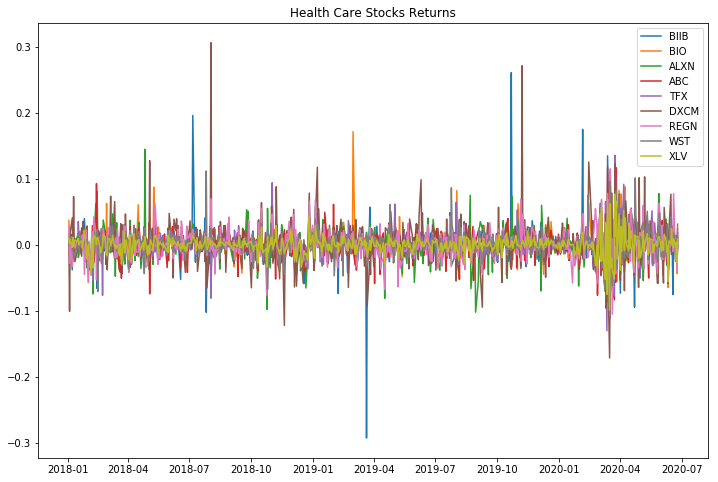

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

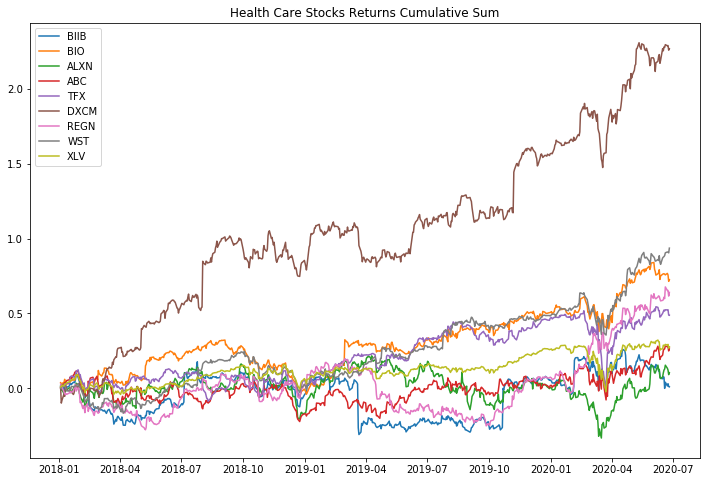

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

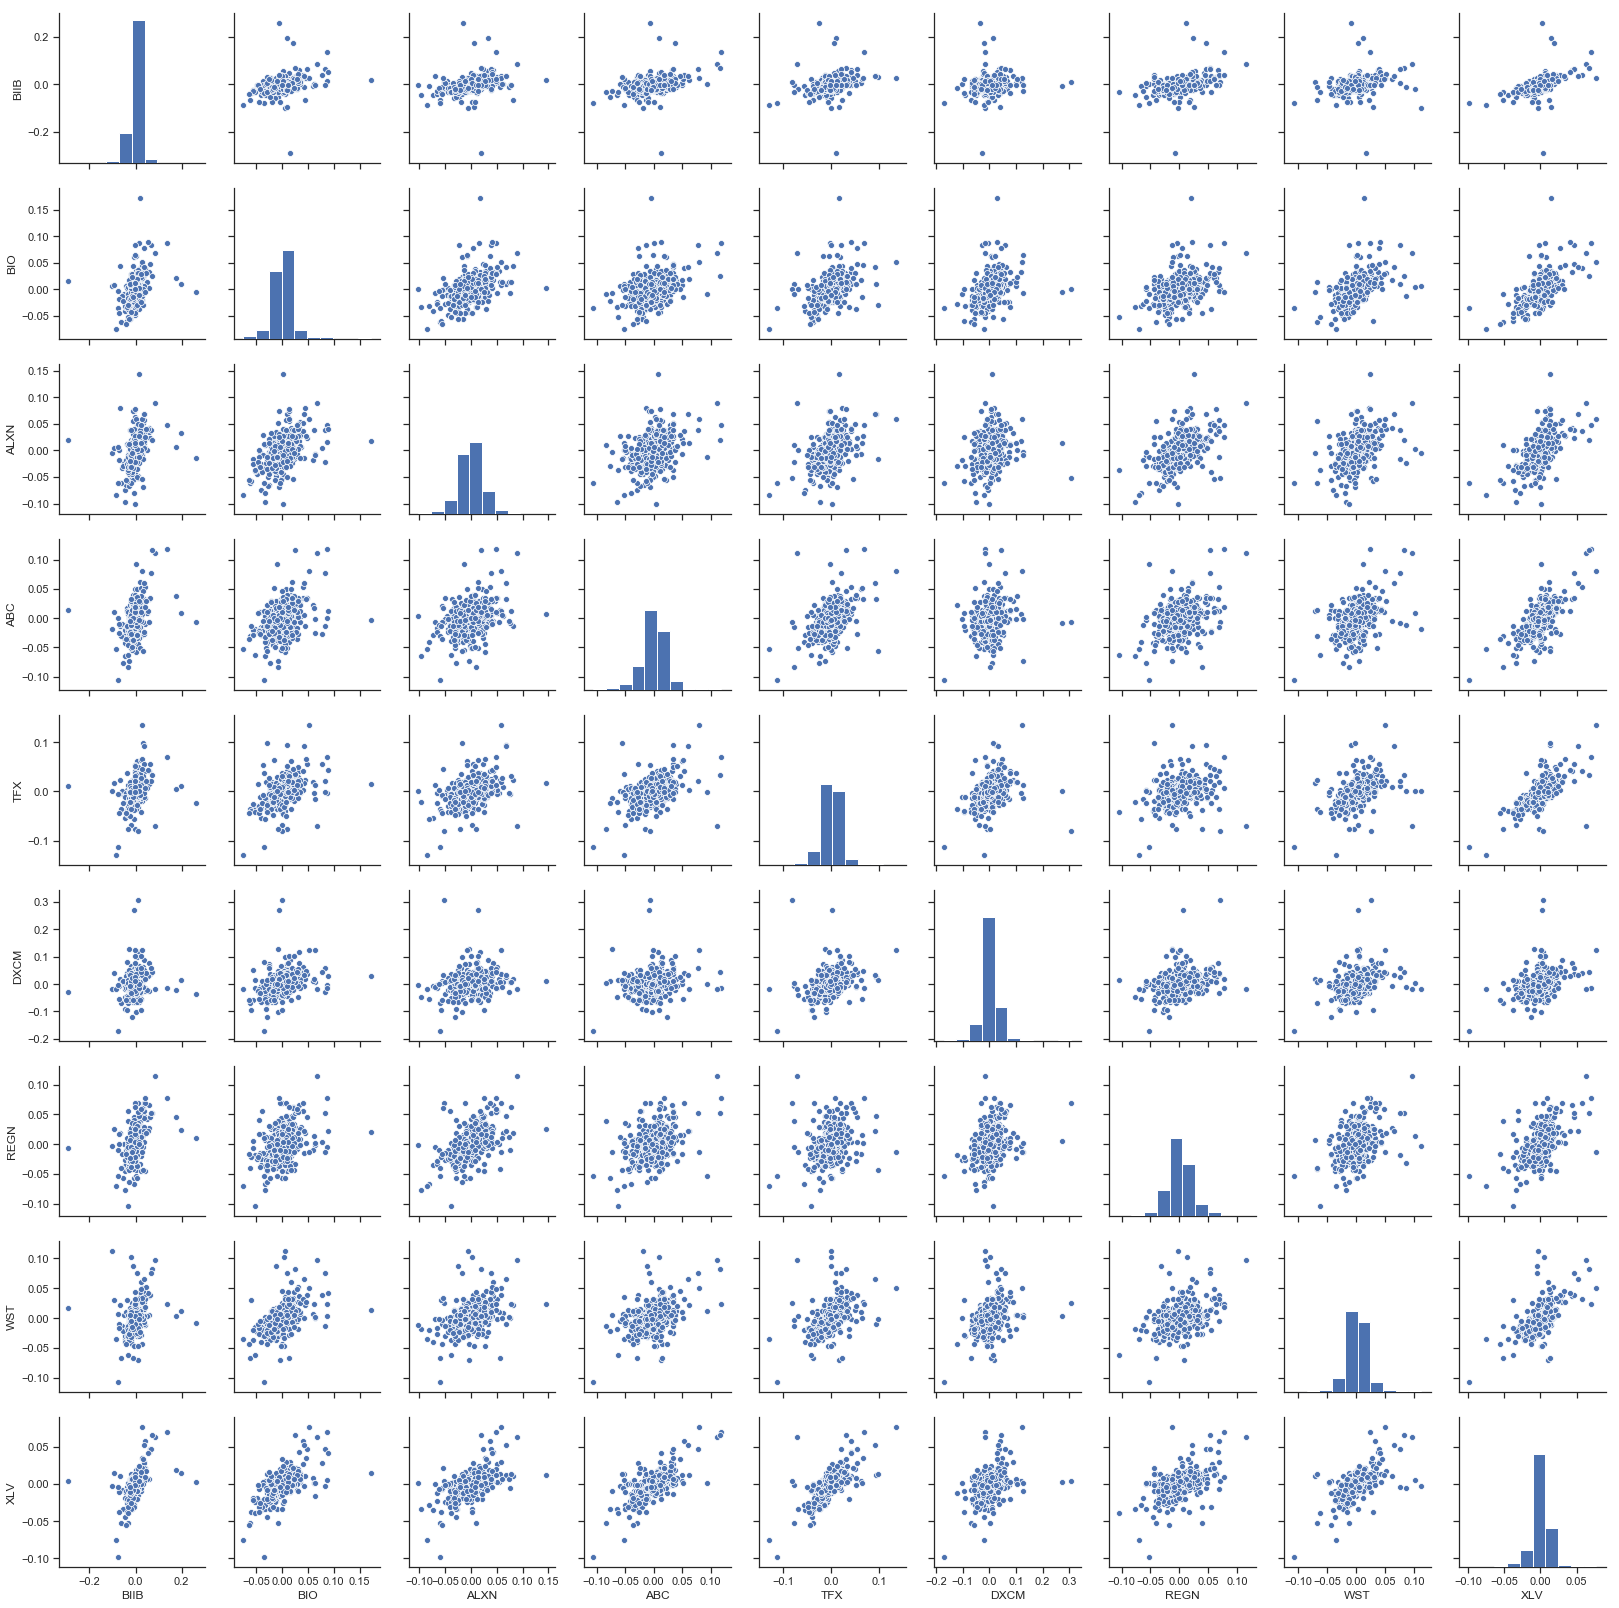

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

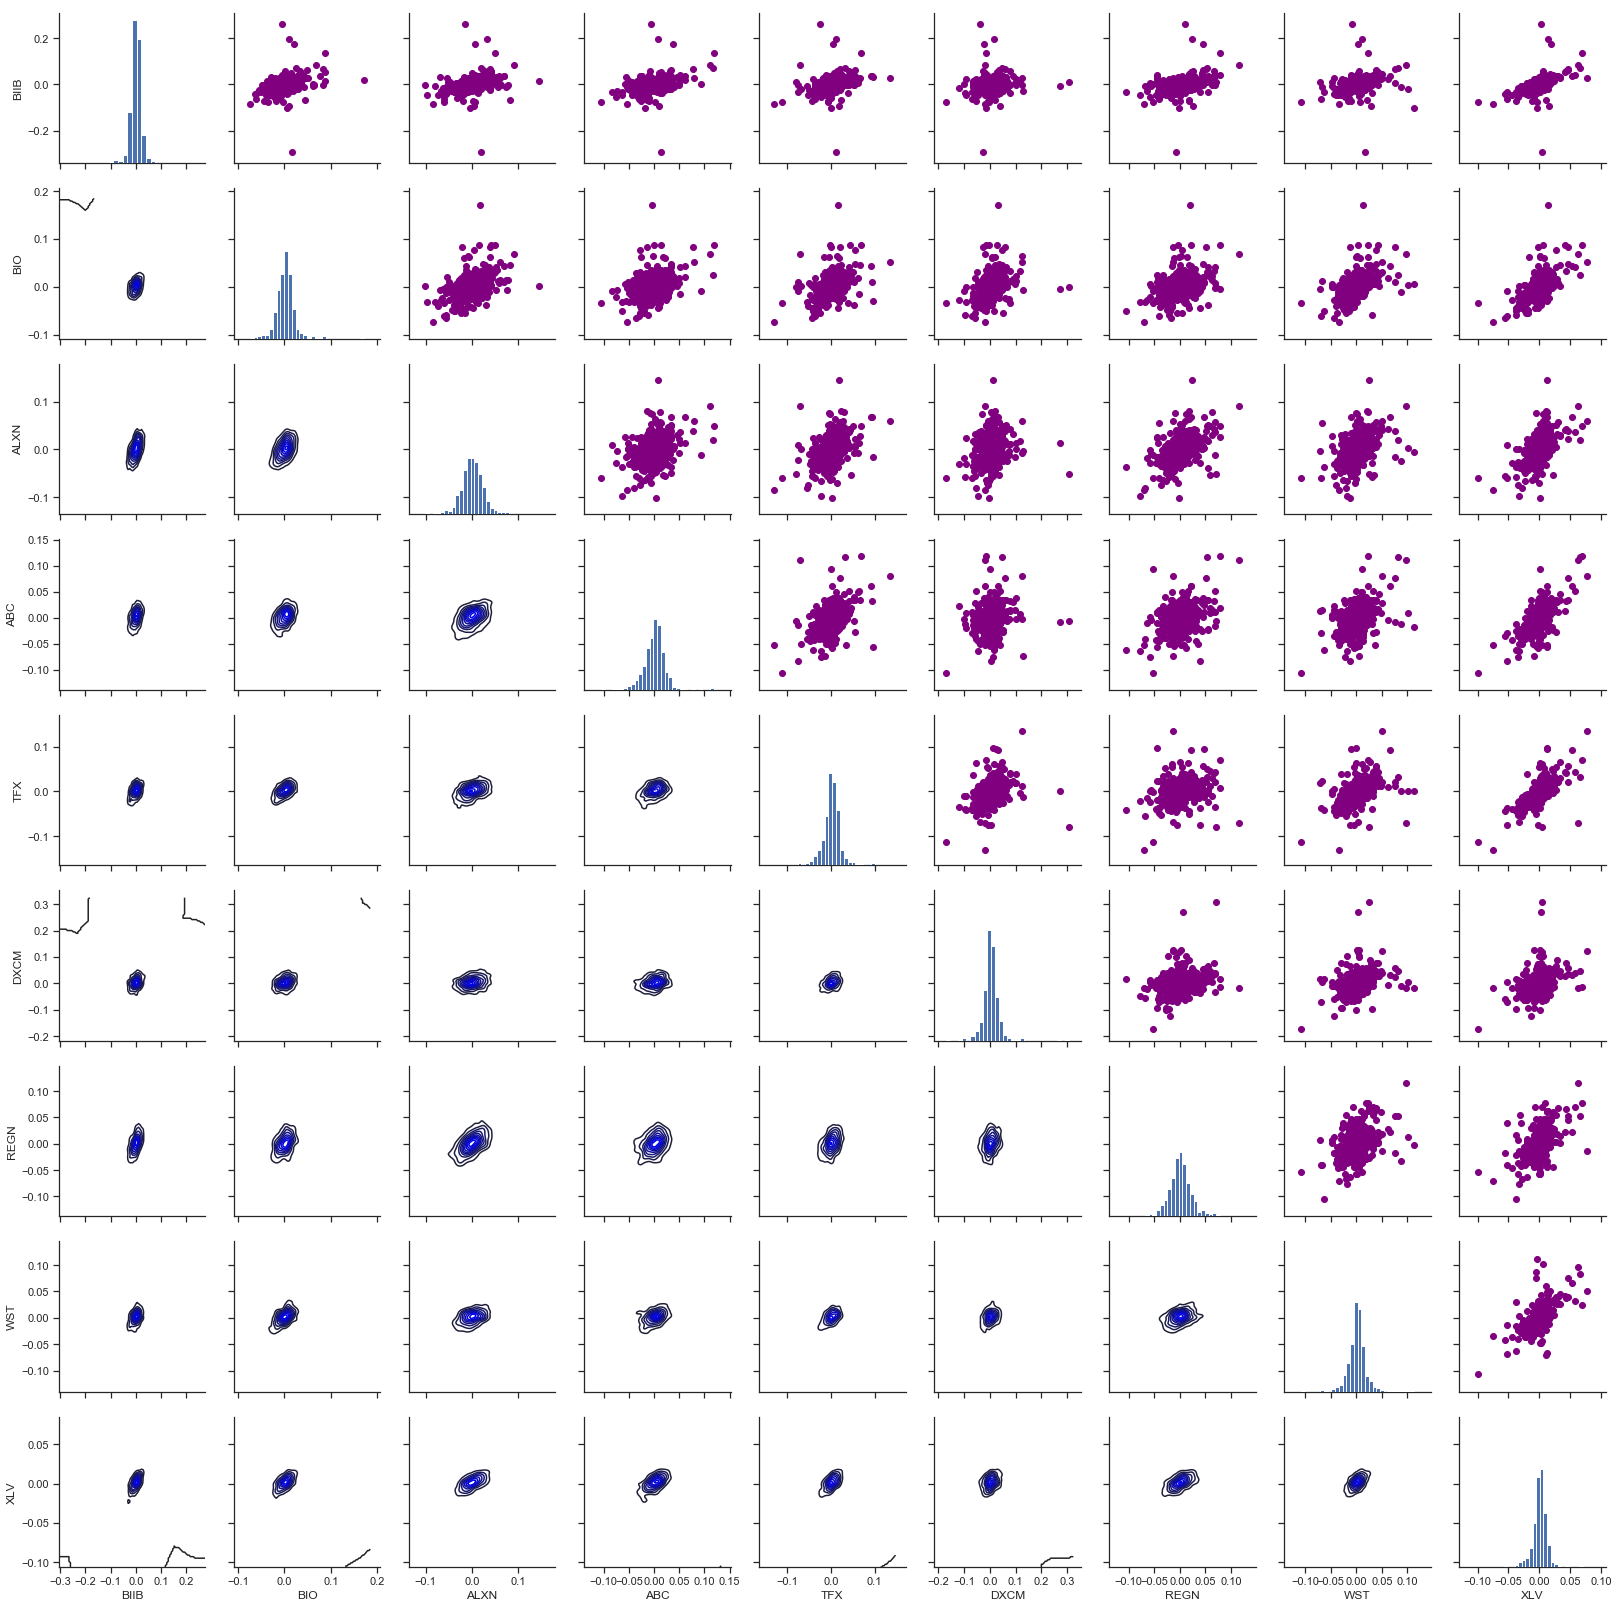

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

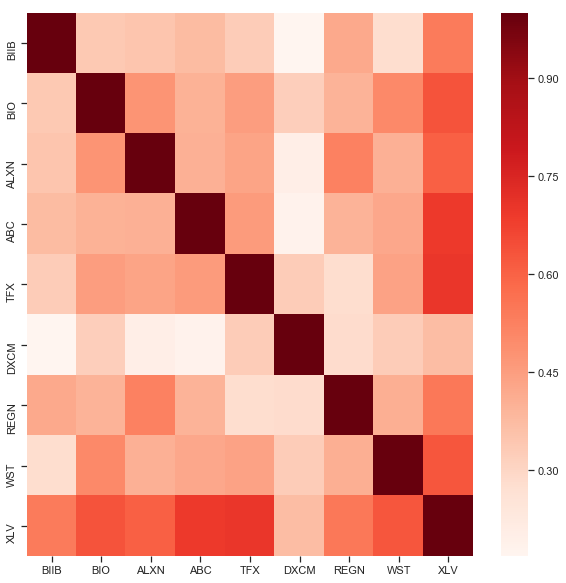

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

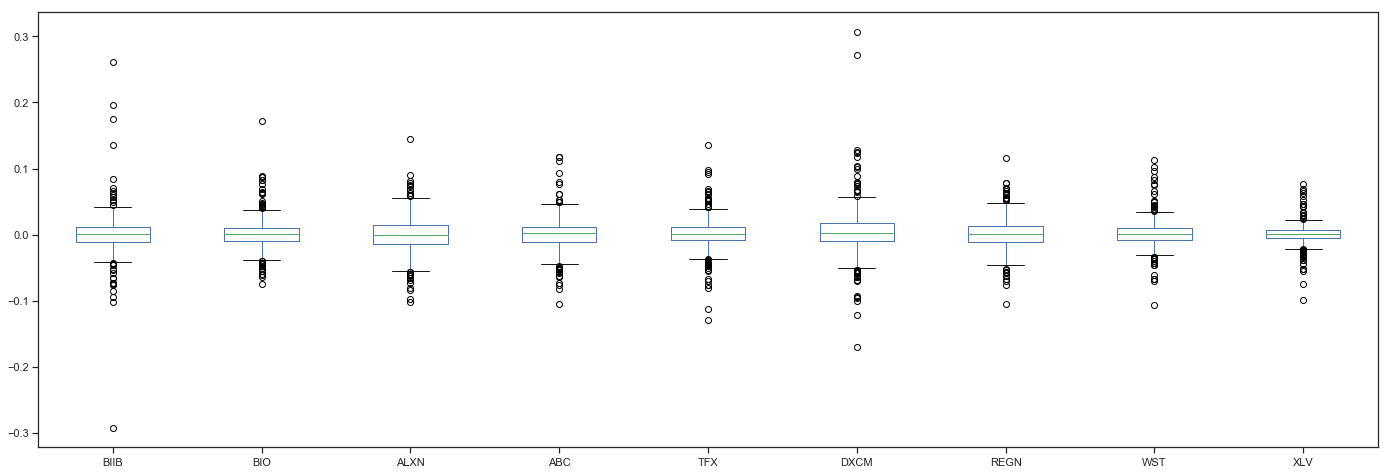

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

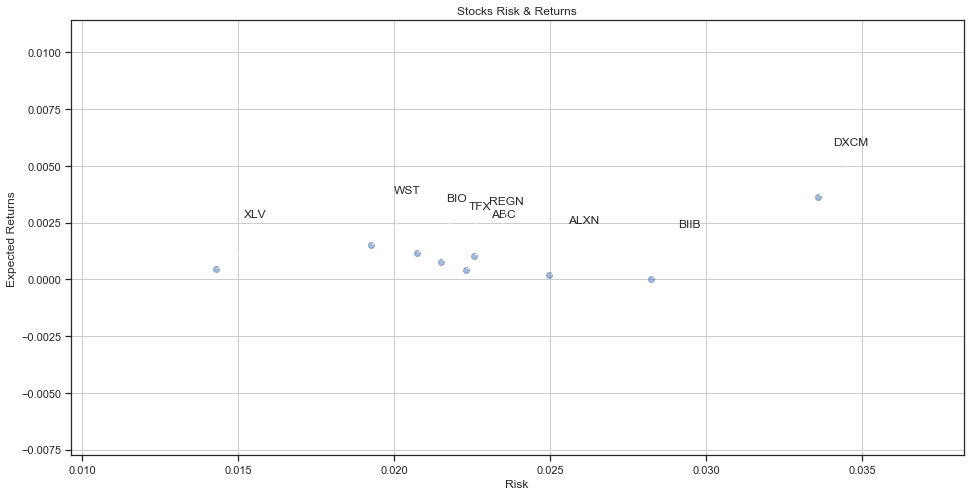

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

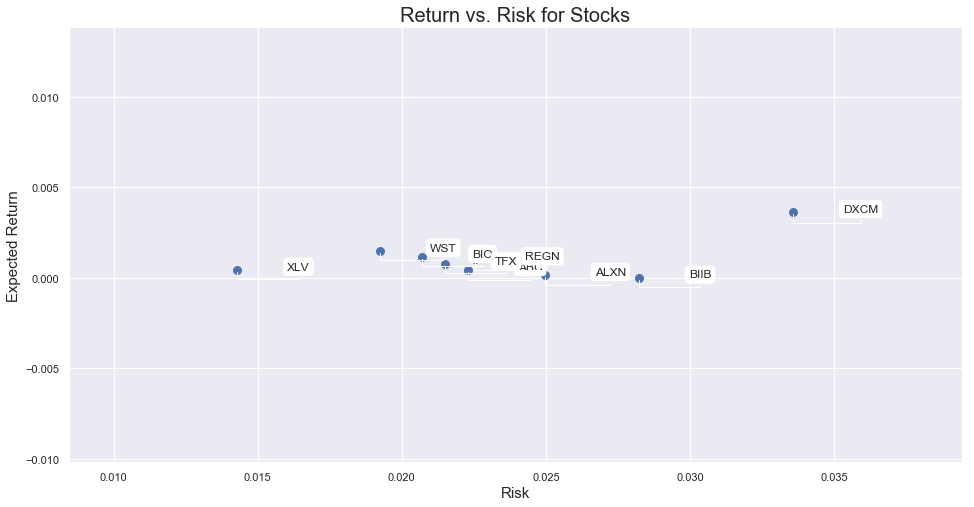

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [22]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
BIIB,0.003970,0.448064
BIO,0.293049,0.328829
ALXN,0.042335,0.396347
ABC,0.108282,0.353835
TFX,0.197045,0.341278
DXCM,0.916019,0.533070
REGN,0.258684,0.357796
WST,0.378157,0.305488
XLV,0.111998,0.226870


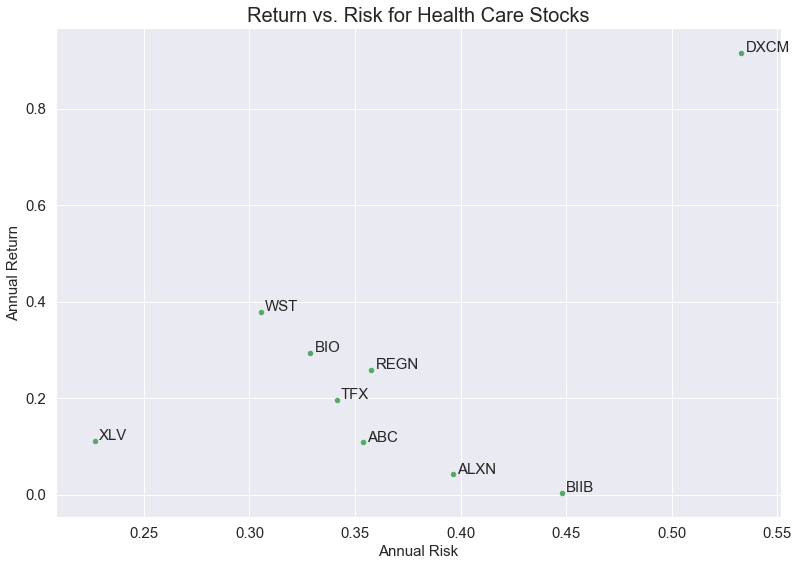

In [23]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [24]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

XLV   XLV     1.000000
WST   WST     1.000000
BIO   BIO     1.000000
ALXN  ALXN    1.000000
ABC   ABC     1.000000
DXCM  DXCM    1.000000
REGN  REGN    1.000000
TFX   TFX     1.000000
BIIB  BIIB    1.000000
XLV   TFX     0.701636
TFX   XLV     0.701636
XLV   ABC     0.691927
ABC   XLV     0.691927
XLV   BIO     0.635489
BIO   XLV     0.635489
WST   XLV     0.627892
XLV   WST     0.627892
ALXN  XLV     0.604720
XLV   ALXN    0.604720
      REGN    0.546016
REGN  XLV     0.546016
BIIB  XLV     0.541614
XLV   BIIB    0.541614
ALXN  REGN    0.525419
REGN  ALXN    0.525419
BIO   WST     0.505116
WST   BIO     0.505116
ALXN  BIO     0.474431
BIO   ALXN    0.474431
ABC   TFX     0.458145
                ...   
REGN  ABC     0.395685
ABC   REGN    0.395685
BIIB  ABC     0.374884
ABC   BIIB    0.374884
XLV   DXCM    0.369974
DXCM  XLV     0.369974
BIIB  ALXN    0.349674
ALXN  BIIB    0.349674
BIIB  BIO     0.340252
BIO   BIIB    0.340252
DXCM  WST     0.329310
WST   DXCM    0.329310
TFX   BIIB 

In [25]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,BIIB,BIO,ALXN,ABC,TFX,DXCM,REGN,WST,XLV
Date,,,,,,,,,
2018-01-03,0.558901,0.455003,0.441626,0.488483,0.517000,0.361343,0.608873,0.493806,0.615814
2018-01-04,0.528931,0.270665,0.338926,0.461903,0.450131,0.147851,0.351351,0.486931,0.569438
2018-01-05,0.541474,0.311920,0.415858,0.525956,0.543930,0.398579,0.501700,0.545563,0.609834
2018-01-08,0.460443,0.334565,0.309921,0.545945,0.502635,0.443823,0.327905,0.514091,0.540646
2018-01-09,0.564968,0.385607,0.483321,0.500449,0.539147,0.326358,0.429047,0.528790,0.628366


In [26]:
Normalized_Value.corr()

,BIIB,BIO,ALXN,ABC,TFX,DXCM,REGN,WST,XLV
BIIB,1.000000,0.340252,0.349674,0.374884,0.329127,0.168099,0.424550,0.279698,0.541614
BIO,0.340252,1.000000,0.474431,0.399701,0.452347,0.322785,0.398075,0.505116,0.635489
ALXN,0.349674,0.474431,1.000000,0.404539,0.435907,0.201351,0.525419,0.404966,0.604720
ABC,0.374884,0.399701,0.404539,1.000000,0.458145,0.183582,0.395685,0.427410,0.691927
TFX,0.329127,0.452347,0.435907,0.458145,1.000000,0.328802,0.279387,0.440578,0.701636
DXCM,0.168099,0.322785,0.201351,0.183582,0.328802,1.000000,0.284672,0.329310,0.369974
REGN,0.424550,0.398075,0.525419,0.395685,0.279387,0.284672,1.000000,0.408327,0.546016
WST,0.279698,0.505116,0.404966,0.427410,0.440578,0.329310,0.408327,1.000000,0.627892
XLV,0.541614,0.635489,0.604720,0.691927,0.701636,0.369974,0.546016,0.627892,1.000000


In [27]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

XLV   XLV     1.000000
WST   WST     1.000000
BIO   BIO     1.000000
ALXN  ALXN    1.000000
ABC   ABC     1.000000
DXCM  DXCM    1.000000
REGN  REGN    1.000000
TFX   TFX     1.000000
BIIB  BIIB    1.000000
XLV   TFX     0.701636
TFX   XLV     0.701636
XLV   ABC     0.691927
ABC   XLV     0.691927
XLV   BIO     0.635489
BIO   XLV     0.635489
WST   XLV     0.627892
XLV   WST     0.627892
ALXN  XLV     0.604720
XLV   ALXN    0.604720
      REGN    0.546016
REGN  XLV     0.546016
BIIB  XLV     0.541614
XLV   BIIB    0.541614
ALXN  REGN    0.525419
REGN  ALXN    0.525419
BIO   WST     0.505116
WST   BIO     0.505116
ALXN  BIO     0.474431
BIO   ALXN    0.474431
ABC   TFX     0.458145
                ...   
REGN  ABC     0.395685
ABC   REGN    0.395685
BIIB  ABC     0.374884
ABC   BIIB    0.374884
XLV   DXCM    0.369974
DXCM  XLV     0.369974
BIIB  ALXN    0.349674
ALXN  BIIB    0.349674
BIIB  BIO     0.340252
BIO   BIIB    0.340252
DXCM  WST     0.329310
WST   DXCM    0.329310
TFX   BIIB 

In [28]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
BIIB    0.000016
BIO     0.001163
ALXN    0.000168
ABC     0.000430
TFX     0.000782
DXCM    0.003635
REGN    0.001027
WST     0.001501
XLV     0.000444
dtype: float64
--------------------------------------------------
Stock risks:
BIIB    0.028225
BIO     0.020714
ALXN    0.024968
ABC     0.022290
TFX     0.021499
DXCM    0.033580
REGN    0.022539
WST     0.019244
XLV     0.014291
dtype: float64


In [29]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
BIIB,0.000016,0.028225
ALXN,0.000168,0.024968
ABC,0.000430,0.022290
XLV,0.000444,0.014291
TFX,0.000782,0.021499
REGN,0.001027,0.022539
BIO,0.001163,0.020714
WST,0.001501,0.019244
DXCM,0.003635,0.033580


In [30]:
table.sort_values(by='Risk')

,Returns,Risk
XLV,0.000444,0.014291
WST,0.001501,0.019244
BIO,0.001163,0.020714
TFX,0.000782,0.021499
ABC,0.000430,0.022290
REGN,0.001027,0.022539
ALXN,0.000168,0.024968
BIIB,0.000016,0.028225
DXCM,0.003635,0.033580


In [31]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
BIIB,0.000016,0.028225,-0.353733
BIO,0.001163,0.020714,-0.426620
ALXN,0.000168,0.024968,-0.393791
ABC,0.000430,0.022290,-0.429364
TFX,0.000782,0.021499,-0.428777
DXCM,0.003635,0.033580,-0.189546
REGN,0.001027,0.022539,-0.398131
WST,0.001501,0.019244,-0.441665
XLV,0.000444,0.014291,-0.668620


In [32]:
table['Max Returns'] = rets.max()

In [33]:
table['Min Returns'] = rets.min()

In [34]:
table['Median Returns'] = rets.median()

In [35]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
BIIB,0.000016,0.028225,-0.353733,0.261107,-0.292305,0.000733,-0.155871
BIO,0.001163,0.020714,-0.426620,0.171687,-0.074554,0.001213,1.114652
ALXN,0.000168,0.024968,-0.393791,0.145040,-0.101721,0.000041,1.357753
ABC,0.000430,0.022290,-0.429364,0.118151,-0.105556,0.001600,1.851479
TFX,0.000782,0.021499,-0.428777,0.135680,-0.129706,0.001447,-0.098507
DXCM,0.003635,0.033580,-0.189546,0.306475,-0.170970,0.002311,0.961199
REGN,0.001027,0.022539,-0.398131,0.115373,-0.104893,0.000971,2.465960
WST,0.001501,0.019244,-0.441665,0.112170,-0.107043,0.001218,3.163829
XLV,0.000444,0.014291,-0.668620,0.077057,-0.098610,0.001136,0.982096


In [36]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
BIIB,0.000016,0.028225,-0.353733,0.261107,-0.292305,0.000733,-0.155871,-0.000002
BIO,0.001163,0.020714,-0.426620,0.171687,-0.074554,0.001213,1.114652,0.000012
ALXN,0.000168,0.024968,-0.393791,0.145040,-0.101721,0.000041,1.357753,0.000015
ABC,0.000430,0.022290,-0.429364,0.118151,-0.105556,0.001600,1.851479,0.000020
TFX,0.000782,0.021499,-0.428777,0.135680,-0.129706,0.001447,-0.098507,-0.000001
DXCM,0.003635,0.033580,-0.189546,0.306475,-0.170970,0.002311,0.961199,0.000011
REGN,0.001027,0.022539,-0.398131,0.115373,-0.104893,0.000971,2.465960,0.000027
WST,0.001501,0.019244,-0.441665,0.112170,-0.107043,0.001218,3.163829,0.000034
XLV,0.000444,0.014291,-0.668620,0.077057,-0.098610,0.001136,0.982096,0.000011


In [37]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BIIB,0.000016,0.028225,-0.353733,0.261107,-0.292305,0.000733,-0.155871,-0.000002,-0.064880
BIO,0.001163,0.020714,-0.426620,0.171687,-0.074554,0.001213,1.114652,0.000012,0.179848
ALXN,0.000168,0.024968,-0.393791,0.145040,-0.101721,0.000041,1.357753,0.000015,-0.024517
ABC,0.000430,0.022290,-0.429364,0.118151,-0.105556,0.001600,1.851479,0.000020,0.032200
TFX,0.000782,0.021499,-0.428777,0.135680,-0.129706,0.001447,-0.098507,-0.000001,0.100373
DXCM,0.003635,0.033580,-0.189546,0.306475,-0.170970,0.002311,0.961199,0.000011,0.709864
REGN,0.001027,0.022539,-0.398131,0.115373,-0.104893,0.000971,2.465960,0.000027,0.143850
WST,0.001501,0.019244,-0.441665,0.112170,-0.107043,0.001218,3.163829,0.000034,0.256989
XLV,0.000444,0.014291,-0.668620,0.077057,-0.098610,0.001136,0.982096,0.000011,0.061239


In [38]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BIIB,0.000016,0.028225,-0.353733,0.261107,-0.292305,0.000733,-0.155871,-0.000002,-0.064880
TFX,0.000782,0.021499,-0.428777,0.135680,-0.129706,0.001447,-0.098507,-0.000001,0.100373
DXCM,0.003635,0.033580,-0.189546,0.306475,-0.170970,0.002311,0.961199,0.000011,0.709864
XLV,0.000444,0.014291,-0.668620,0.077057,-0.098610,0.001136,0.982096,0.000011,0.061239
BIO,0.001163,0.020714,-0.426620,0.171687,-0.074554,0.001213,1.114652,0.000012,0.179848
ALXN,0.000168,0.024968,-0.393791,0.145040,-0.101721,0.000041,1.357753,0.000015,-0.024517
ABC,0.000430,0.022290,-0.429364,0.118151,-0.105556,0.001600,1.851479,0.000020,0.032200
REGN,0.001027,0.022539,-0.398131,0.115373,-0.104893,0.000971,2.465960,0.000027,0.143850
WST,0.001501,0.019244,-0.441665,0.112170,-0.107043,0.001218,3.163829,0.000034,0.256989
